In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)
print(train_input, train_target)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [4]:
print(train_target)
print(train_input.shape, train_target.shape)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
(42, 1) (42,)


In [5]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))


0.9746459963987609


In [6]:
test_prediction = knr.predict((test_input))
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target)) # 과소 적합

35.42380952380951
0.9746459963987609
0.9804899950518966


In [7]:
print(knr.predict([[50]]))

[1033.33333333]


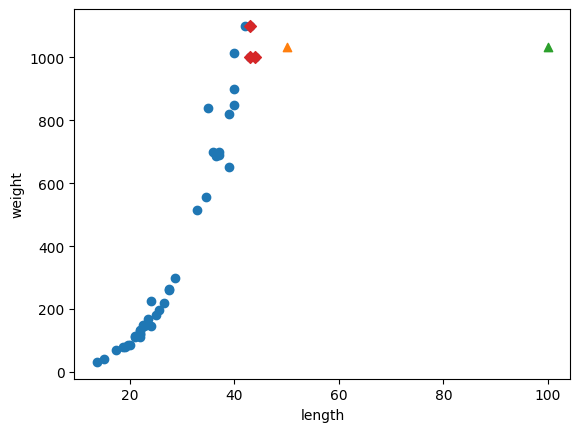

In [8]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker="^")
plt.scatter(100, 1033, marker="^")
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [9]:
print(knr.predict([[100]]))

[1033.33333333]


In [11]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


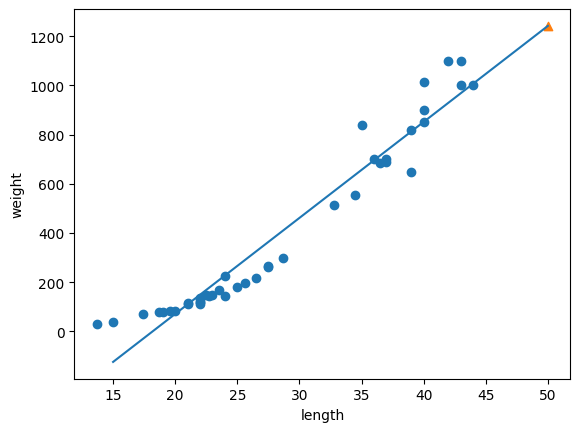

In [12]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [13]:
# 전체적으로 과소적합
print(lr.score(test_input, test_target))
print(lr.score(train_input, train_target))

print(lr.predict([[50]]))
print(lr.predict([[5]]))

0.8247503123313558
0.939846333997604
[1241.83860323]
[-513.93292014]


전체적으로 과소 적합된 모습이다.

길이와 무게는 0이하로 떨어질수 없으므로, 직선은 맞지 않는다.길이가 5센치의 농어는 음수가 나온다.

In [14]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))
print(train_poly.shape, test_poly.shape)
print(train_poly.shape, train_target.shape)

(42, 2) (14, 2)
(42, 2) (42,)


In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
print(lr.predict([[50**2, 50]]))
print(lr.predict([[5**2, 5]]))

[1573.98423528]
[33.61888862]


In [17]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [19]:
point = np.arange(15, 50)

plt.scatter()

ValueError: Found array with dim 3. LinearRegression expected <= 2.